<a href="https://colab.research.google.com/github/keerthana-narra/MLOps-Integrated-Travel/blob/main/Colab-files/Gender_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gender classification**



##### **Project Type**    - Machine Learning
##### **Contribution**    -


Github link :

Project Documentation : [Documentation link]

Presentation : [Video link]

# **Problem Statement and Objective**


**Problem Overview**



**Objective:**


# ***Let's Begin !***

## ***1. Know Your Data***

Before we diving into the project, our initial step is to familiarize ourselves with the dataset. Let's load the data and take a look.

### Import Libraries

In [1]:
#!pip install gender_guesser

In [2]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import gender_guesser.detector as gender

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

import time


import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Load the dataset
df=pd.read_csv('/content/drive/MyDrive/Almabetter/Masters/Specilization/Module1/Capstone/users.csv',na_values=['none', 'None'])

In [5]:
# Change column names to lowercase with underscores instead of spaces
df.columns = df.columns.str.lower().str.replace(' ', '_')

### Peek into data 👀

In [6]:
#First 5 rows
df.head(2)

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37


In [7]:
#Last 5 rows
df.tail(2)

,code,company,name,gender,age
1338,1338,Umbrella LTDA,Viola Agosta,female,52
1339,1339,Umbrella LTDA,Paul Rodriguez,male,35


In [8]:
# Dataset Rows & Columns
print(f'Shape of original dataframe:  {df.shape}')

Shape of original dataframe:  (1340, 5)


## ***2. Understanding Data & Preprocessing***

Moving forward to the next stage, our focus is on gaining a deeper understanding of the data and undertaking the initial preprocessing steps. These initial preprocessing efforts are crucial for enhancing the usability of the data in subsequent analyses.

### **Understanding Data**

In [9]:
#Variables in the dataset
print(f'Variables in the dataset : {list(df.columns)}')

Variables in the dataset : ['code', 'company', 'name', 'gender', 'age']


**Variables Description**

- **code**: User identifier.
- **company**: Associated company.
- **name**: Name of the user.
- **gender**: Gender of the user.
- **age**: Age of the user.


In [10]:
def summary(df):
    summry = pd.DataFrame(df.dtypes, columns=['data type'])
    summry['#missing'] = df.isnull().sum().values
    summry['#duplicate'] = df.duplicated().sum()
    summry['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summry['min'] = desc['min'].values
    summry['max'] = desc['max'].values
    summry['avg'] = desc['mean'].values
    summry['std dev'] = desc['std'].values
    summry['top value'] = desc['top'].values
    summry['freq'] = desc['freq'].values

    return summry

In [11]:
summary(df).style.set_caption(" Summary of the Data ").\
background_gradient(cmap='Blues', axis=0). \
set_properties(**{'border': '1.3px dotted', 'color': '', 'caption-side': 'left'})

,data type,#missing,#duplicate,#unique,min,max,avg,std dev,top value,freq
code,int64,0,0,1340,0.000000,1339.000000,669.500000,386.968991,nan,nan
company,object,0,0,5,nan,nan,nan,nan,4You,453
name,object,0,0,1338,nan,nan,nan,nan,Charlotte Johnson,2
gender,object,440,0,2,nan,nan,nan,nan,male,452
age,int64,0,0,45,21.000000,65.000000,42.742537,12.869779,nan,nan


In [12]:
def print_unique_counts(df, columns):
    for col in columns:
        unique_count = df[col].nunique()
        value_counts = df[col].value_counts()
        print(f"There are {unique_count} unique values and counts of each in {value_counts}\n")

# Columns to check uniques and values
columns_to_print = ['company', 'gender']
print_unique_counts(df, columns_to_print)

There are 5 unique values and counts of each in company
4You             453
Acme Factory     261
Wonka Company    237
Monsters CYA     195
Umbrella LTDA    194
Name: count, dtype: int64

There are 2 unique values and counts of each in gender
male      452
female    448
Name: count, dtype: int64



### ***Data Preprocessing***
This step before EDA helps us to understand data easily further
1. Drop the unique identifier and check for duplicates. As the unique identifier is a row generator.
2. Seperate rows with gender is null - Will use created model to predict gender at the end


In [13]:
# Filter rows where 'gender' is NaN
df_predict_gender = df[pd.isna(df['gender'])]
df = df[~pd.isna(df['gender'])]

In [14]:
# This function helps us to check and drop duplicates whenever required
def check_drop_duplications(df):
  if len(df[df.duplicated()]) > 0:
    print(f'Count of duplicate rows : {len(df[df.duplicated()])}')
    print(f'Dropping duplicates')
    df = df.drop_duplicates()
  else:
    print(f'There are no duplicates.')
  return df

In [15]:
# Dropping identifiers
df = df.drop(columns = ['code'])

In [16]:
# Lets see if we have any duplicate rows
df = check_drop_duplications(df)

There are no duplicates.


## ***3. Exploratory Data Analysis***

#### Chart-1 Gender distibution

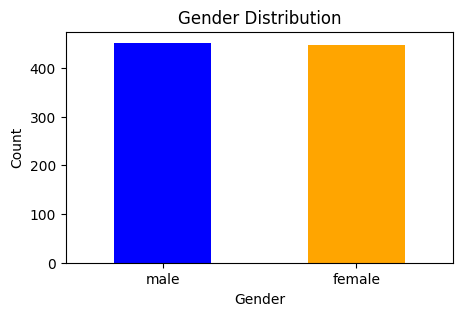

In [17]:
# Gender distribution
gender_counts = df['gender'].value_counts(dropna=False)
plt.figure(figsize=(5, 3))
gender_counts.plot(kind='bar', color=['blue', 'orange', 'gray'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### Chart - 2 Gender distribution over comapany - Stacked



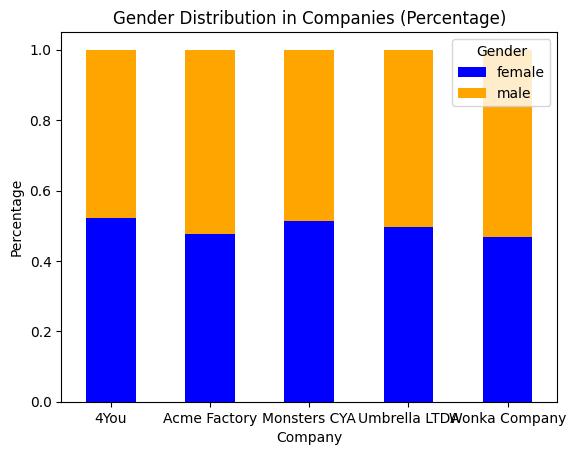

In [18]:
# Gender distribution in companies
company_gender_counts = df.pivot_table(index='company', columns='gender', aggfunc='size', fill_value=0)

# Normalize the counts to get percentages
company_gender_percentages = company_gender_counts.div(company_gender_counts.sum(axis=1), axis=0)

# Plotting the percentage stacked bar chart
company_gender_percentages.plot(kind='bar', stacked=True, color=['blue', 'orange', 'gray'])
plt.title('Gender Distribution in Companies (Percentage)')
plt.xlabel('Company')
plt.ylabel('Percentage')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()

#### Chart 3 - Gender distribution over age

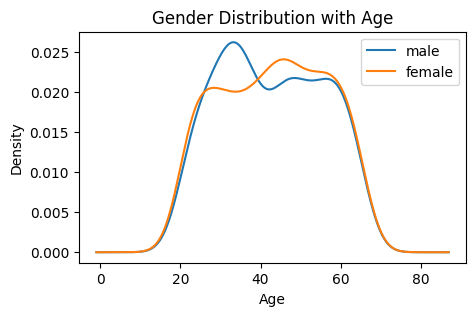

In [19]:
# Gender distribution with age
plt.figure(figsize=(5, 3))
for gender in df['gender'].dropna().unique():
    df[df['gender'] == gender]['age'].plot(kind='kde', label=gender)
plt.title('Gender Distribution with Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

### Overall Insights

This shows that age, company have nothing to contribute with the dataset.

## ***4. Feature Engineering***

### 1. Feature Engineering

In [20]:
import gender_guesser.detector as gender

# Extract first and last names
df['first_name'] = df['name'].apply(lambda x: x.split()[0])
df['last_name'] = df['name'].apply(lambda x: x.split()[-1])

# Initialize the gender detector
d = gender.Detector()

# Predict gender for each first name in the dataset
df['gender_guess'] = df['first_name'].apply(d.get_gender)

In [21]:
# Mapping dictionary
gender_mapping = {
    'andy': 'unisex',
    'unknown': 'unisex',
    'mostly_male': 'male',
    'mostly_female': 'female',
    'male': 'male',
    'female': 'female'
}

# Replace the predicted gender values using the mapping dictionary
df['gender_guess'] = df['gender_guess'].map(gender_mapping)
# Convert gender labels to binary values
df['gender'] = df['gender'].map({'male': 0, 'female': 1})

### 2. Drop Unnecesary columns

In [22]:
# Drop unnecessary columns and columns with very high percentage of nulls
# Drop columns which are not useful because of high number of missing values or high number of categories
drop_cols = ['company','name','last_name','age']
df = df.drop(columns=drop_cols)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 0 to 1339
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   gender        900 non-null    int64 
 1   first_name    900 non-null    object
 2   gender_guess  900 non-null    object
dtypes: int64(1), object(2)
memory usage: 28.1+ KB


In [23]:
# check duplicates after removing date
df = check_drop_duplications(df)

Count of duplicate rows : 410
Dropping duplicates


## ***5. Transformation on Train Data***

In [24]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['gender'])
y = df['gender']

In [25]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


### 1. Encoding

In [26]:
# Initialize the encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Columns to encode
columns_for_one_hot_encoding = ['gender_guess']

# Fit & transform encoder
X_train_cat = encoder.fit_transform(X_train[columns_for_one_hot_encoding])

### 2. Vectorizer

In [27]:
# Feature extraction using character n-grams
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 4))
X_train_num = vectorizer.fit_transform(X_train['first_name'])

### 3. Data Transformation

In [28]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit & transform scaler
X_train_num = scaler.fit_transform(X_train_num.toarray())

## ***6.Modelling & Evaluation***

In [29]:
# Function to train and evaluate a classification model
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    time_taken = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    return accuracy, precision, recall, f1, roc_auc, time_taken


In [30]:
# Stack numerical and categorical features
X_train = np.hstack((X_train_num, X_train_cat))
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize a dictionary to store results
results = {}

# Train and evaluate Logistic Regression model
lr_model = LogisticRegression()
results['Logistic Regression'] = train_evaluate_model(lr_model, X_train, y_train, X_val, y_val)

# Train and evaluate Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
results['Random Forest'] = train_evaluate_model(rf_model, X_train, y_train, X_val, y_val)

# Train and evaluate XGBoost model
xgb_model = XGBClassifier()
results['XGBoost'] = train_evaluate_model(xgb_model, X_train, y_train, X_val, y_val)

# Convert results to a DataFrame
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'Time Taken (s)']).T
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

results_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC,Time Taken (s)
0,Logistic Regression,0.977528,0.979592,0.979592,0.979592,0.979592,0.056616
1,Random Forest,0.966292,0.979167,0.959184,0.969072,0.974745,0.691833
2,XGBoost,0.966292,0.979167,0.959184,0.969072,0.978571,7.550750


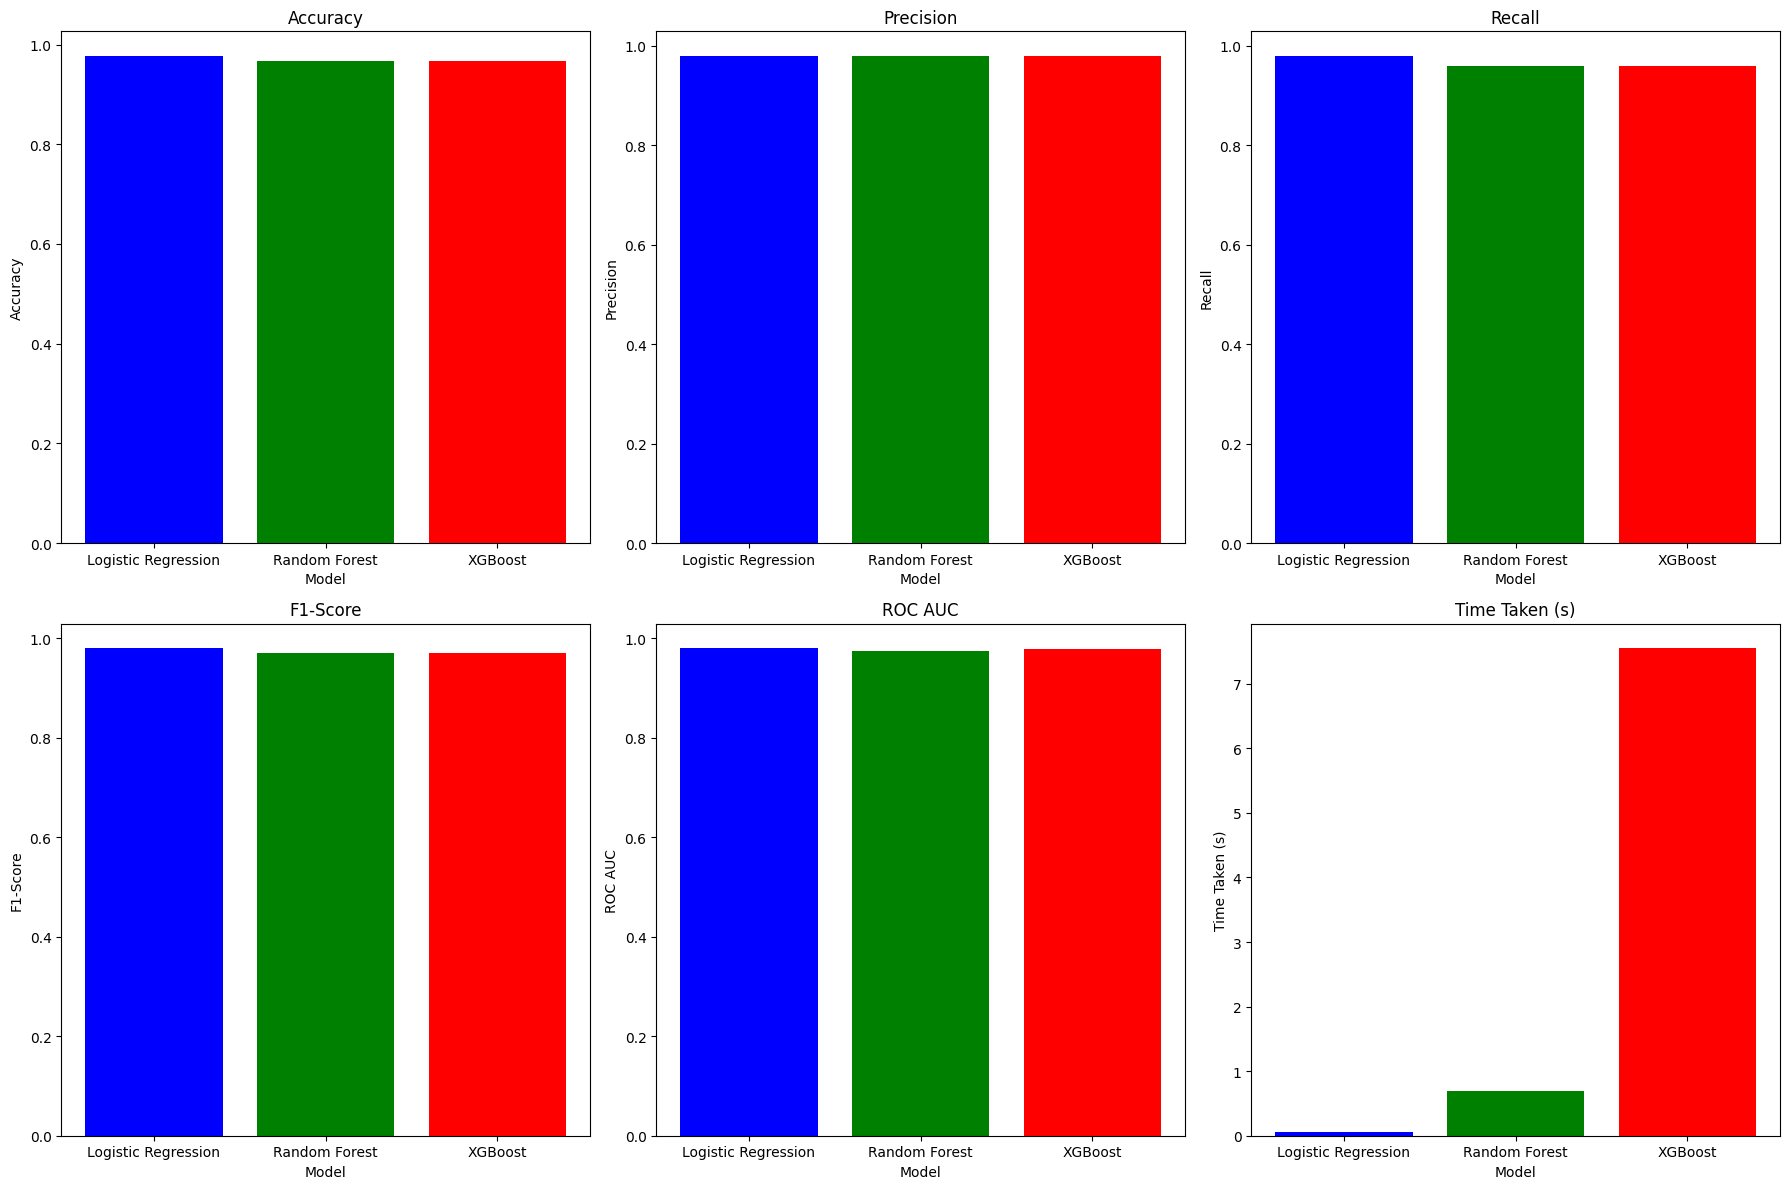

In [31]:
# Plot the results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score','ROC AUC', 'Time Taken (s)']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

for i, metric in enumerate(metrics):
    row, col = divmod(i, 3)
    axes[row, col].bar(results_df['Model'], results_df[metric], color=['blue', 'green', 'red'])
    axes[row, col].set_title(metric)
    axes[row, col].set_ylabel(metric)
    axes[row, col].set_xlabel('Model')

plt.tight_layout()
plt.show()


## ***7.Predictions on dataset having no Gender***

In [32]:
def preprocess_predict(df):
  # Extract first and last names
  df['first_name'] = df['name'].apply(lambda x: x.split()[0])
  # Initialize the gender detector
  d = gender.Detector()
  # Predict gender for each first name in the dataset
  df['gender_guess'] = df['first_name'].apply(d.get_gender)
  # Replace the predicted gender values using the mapping dictionary
  df['gender_guess'] = df['gender_guess'].map(gender_mapping)

  X_cat = encoder.transform(df[['gender_guess']])
  X_num = vectorizer.transform(df['first_name'])
  X_num = scaler.transform(X_num.toarray())
  X = np.hstack((X_num, X_cat))
  y_pred = lr_model.predict(X)
  predictions = np.where(y_pred == 0, 'male', 'female')


  return predictions

In [33]:
df_predict_gender['gender_predicted'] = preprocess_predict(df_predict_gender[['code','name','gender']])
print(f"We have succefully predicted gender for the users from the name using model which has recall of {round(results_df[results_df['Model']=='Logistic Regression']['Recall'].values[0],2)*100}%")

We have succefully predicted gender for the users from the name using model which has recall of 98.0%


In [34]:
# These users doesnt have gender in the dataset
df_predict_gender

,code,company,name,gender,age,gender_predicted
5,5,4You,Trina Thomas,NaN,47,female
8,8,4You,Jack Sabo,NaN,41,male
9,9,4You,Debbie Helms,NaN,35,female
13,13,4You,Irene Tucker,NaN,36,female
17,17,4You,Victor Tribbett,NaN,25,male
...,...,...,...,...,...,...
1319,1319,Umbrella LTDA,Grace Walling,NaN,51,female
1321,1321,Umbrella LTDA,Cynthia Starkey,NaN,59,female
1322,1322,Umbrella LTDA,Irene Cavanaugh,NaN,31,female
1324,1324,Umbrella LTDA,Jason Fraser,NaN,26,male


# **Conclusion**